In [1]:
# KAKSINKERTAINEN EKSPONENTIAALINEN TASOITUSMALLI

# TRENDI, MUTTA EI HAVAITTAVAA KAUSIVAIHTELUA.

# Kaksinkertaista eksponentiaalista tasoitusta kutsutaan myös Holtin malliksi.
# Kaksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa on TRENDI, MUTTA EI HAVAITTAVAA KAUSIVAIHTELUA.
# Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja 
# liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä 
# uusien havaintojen myötä.
# Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
# Huomaa, että tässä esimerkissä kaksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on 
# selkeä kausivaihtelu, jonka malli jättää huomiotta!

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# Tuodaan data
df=pd.read_excel('Saapuneet puhelut viikkotasolla.xlsx')
df

,Date,Saapuneet
0,2017-12-10,663
1,2017-12-17,941
2,2017-12-24,658
3,2017-12-31,1206
4,2018-01-07,991
...,...,...
166,2021-02-14,3353
167,2021-02-21,7303
168,2021-02-28,4699
169,2021-03-07,4666


In [3]:
# Date indexiin
df.index = pd.to_datetime(df['Date'],format="%Y-%m")
df=df.drop('Date',axis=1)
df

,Saapuneet
Date,
2017-12-10,663
2017-12-17,941
2017-12-24,658
2017-12-31,1206
2018-01-07,991
...,...
2021-02-14,3353
2021-02-21,7303
2021-02-28,4699


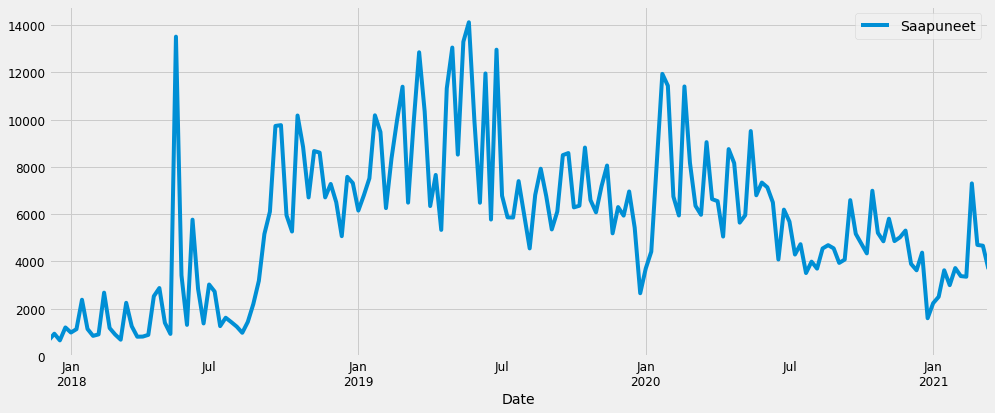

In [4]:
# Visualizing Time Series Data
df.plot(figsize=(15, 6))
plt.show()

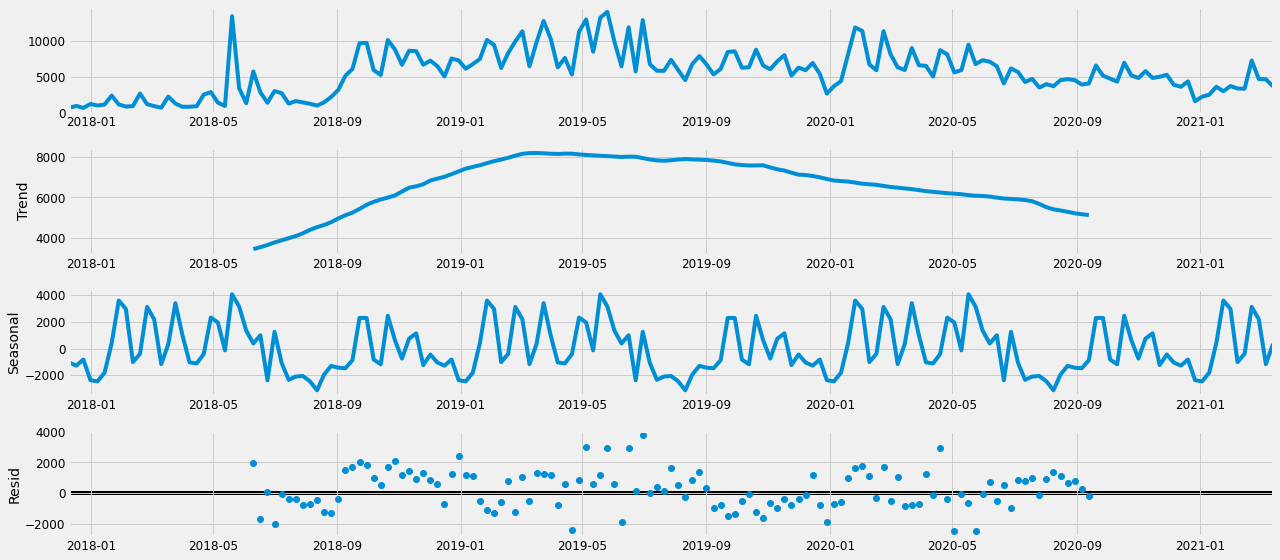

In [5]:
# Visualizing Time Series Data
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [6]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#freq-parametrille käytän arvoa 'W', koska kyseessä on viikottainen data. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], trend = 'add', freq='W').fit()

In [7]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Kone-ennuste'] = malli.fittedvalues
df

,Saapuneet,Kone-ennuste
Date,,
2017-12-10,663,941.000000
2017-12-17,941,1123.270121
2017-12-24,658,1335.905146
2017-12-31,1206,1376.162612
2018-01-07,991,1584.922452
...,...,...
2021-02-14,3353,3128.678373
2021-02-21,7303,3145.415207
2021-02-28,4699,4518.677282


<AxesSubplot:xlabel='Date'>

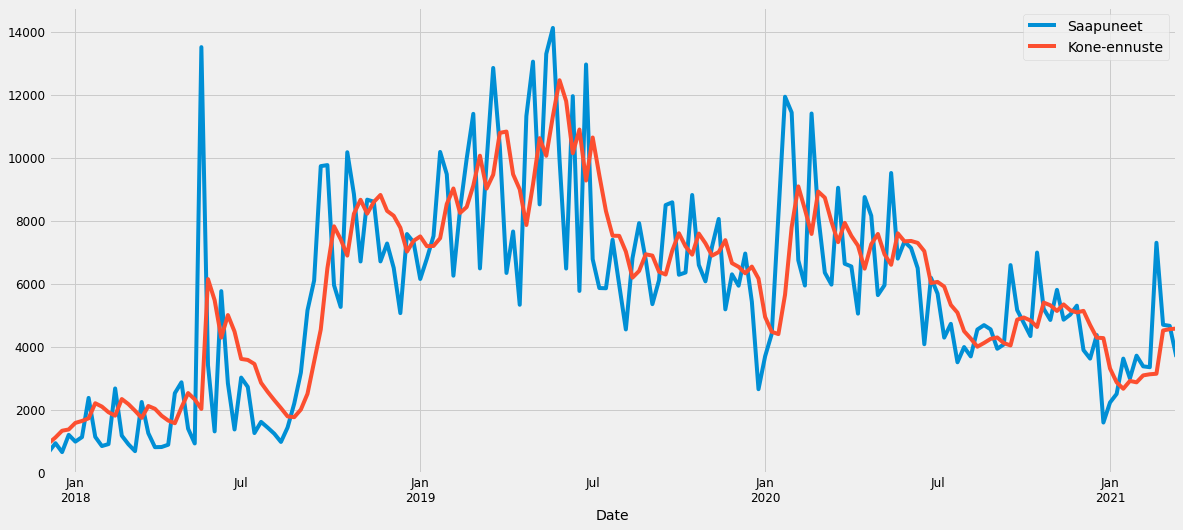

In [8]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Kone-ennuste,Ennustevirhe
Date,,,
2017-12-10,663,941.000000,-278.000000
2017-12-17,941,1123.270121,-182.270121
2017-12-24,658,1335.905146,-677.905146
2017-12-31,1206,1376.162612,-170.162612
2018-01-07,991,1584.922452,-593.922452
...,...,...,...
2021-02-14,3353,3128.678373,224.321627
2021-02-21,7303,3145.415207,4157.584793
2021-02-28,4699,4518.677282,180.322718


Text(0, 0.5, 'Ennustevirhe')

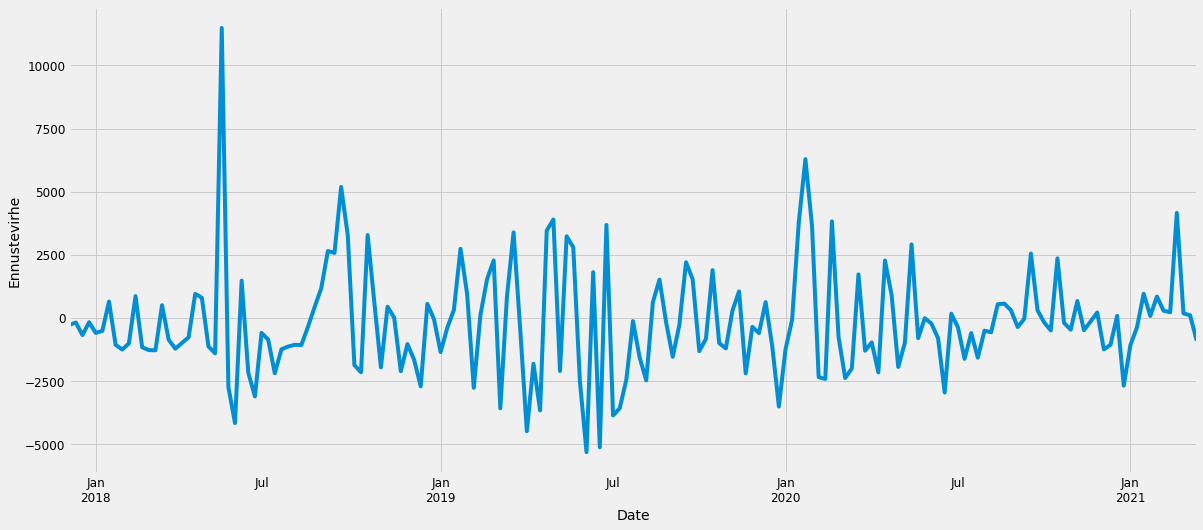

In [10]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

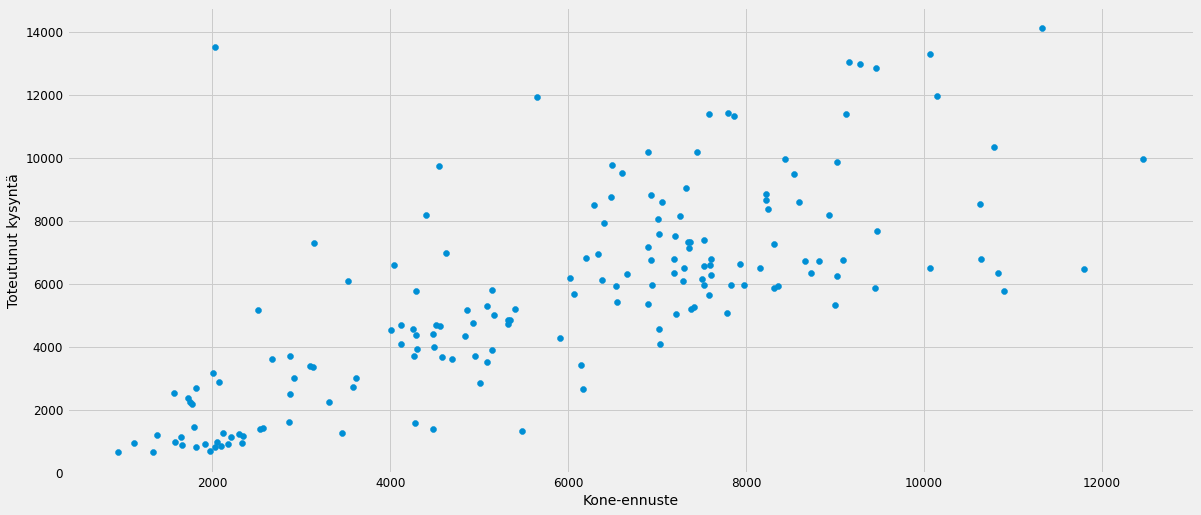

In [11]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Kone-ennuste'], y = df['Saapuneet'])
plt.xlabel('Kone-ennuste')
plt.ylabel('Toteutunut kysyntä')

In [12]:
malli.summary()

Dep. Variable:,Saapuneet,No. Observations:,171
Model:,ExponentialSmoothing,SSE,790908976.544
Optimized:,True,AIC,2632.342
Trend:,Additive,BIC,2644.909
Seasonal:,None,AICC,2632.854
Seasonal Periods:,None,Date:,"Thu, 18 Mar 2021"
Box-Cox:,False,Time:,12:03:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3350000,alpha,True
smoothing_trend,0.0279167,beta,True


In [13]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Kone-ennuste,Ennustevirhe
Date,,,
2021-02-14,3353,3128.678373,224.321627
2021-02-21,7303,3145.415207,4157.584793
2021-02-28,4699,4518.677282,180.322718
2021-03-07,4666,4561.242955,104.757045
2021-03-14,3681,4579.473824,-898.473824


In [14]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2021-03-21', periods = 6, freq = 'W')

# Ennusteet 6 viikolle
ennusteet = malli.forecast(6)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2021-03-21,4253.219749
2021-03-28,4227.954406
2021-04-04,4202.689063
2021-04-11,4177.423720
2021-04-18,4152.158376
2021-04-25,4126.893033


<AxesSubplot:xlabel='Date'>

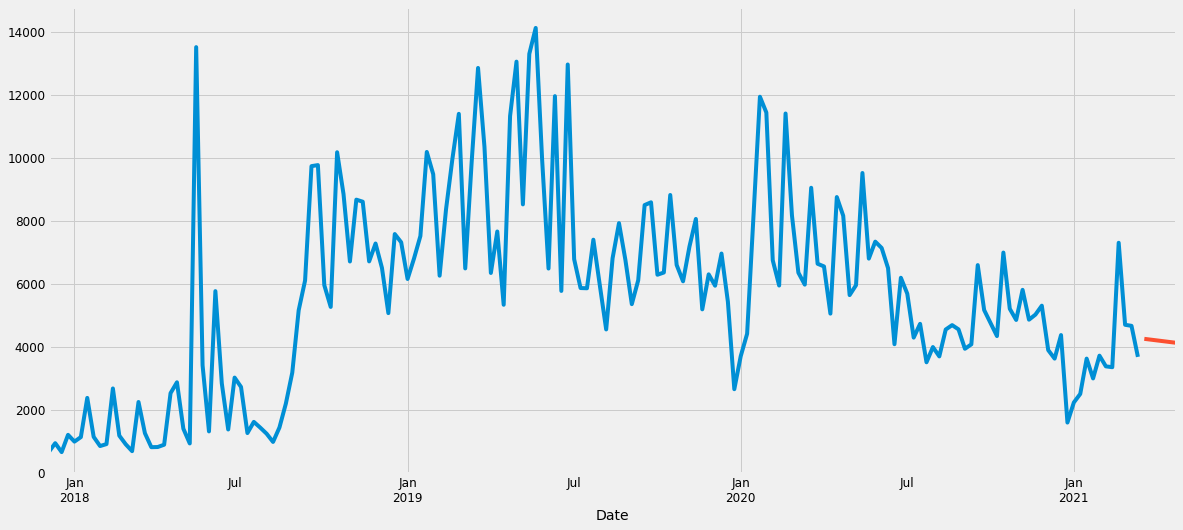

In [15]:
# Viivakaavio havainnoista
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [16]:
df.head()

,Saapuneet,Kone-ennuste,Ennustevirhe
Date,,,
2017-12-10,663,941.000000,-278.000000
2017-12-17,941,1123.270121,-182.270121
2017-12-24,658,1335.905146,-677.905146
2017-12-31,1206,1376.162612,-170.162612
2018-01-07,991,1584.922452,-593.922452


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

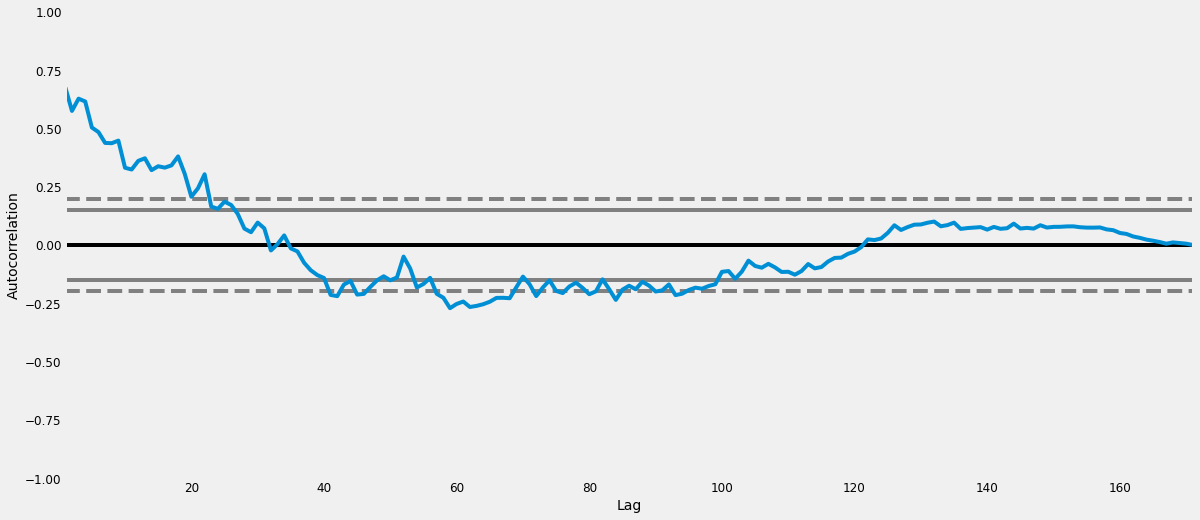

In [17]:
# lasketaan autokorrelaatio
# Vaaka-akselilla on viive (lag) ja pystyakselilla autokorrelaatiokertoimen arvo.

# Aikasarjassa on erotettavissa 20 viikon jaksoissa toistuva kausivaihtelu, jota kaksinkertainen 
# eksponentiaalinen tasoitus ei huomioi ennusteessa. Asiaa voin tarkastella myös autokorrelaatioiden avulla. 
# Autokorrelaatio tarkoittaa aikasarjan korrelaatiota viivästetyn aikasarjan kanssa, esimerkiksi aikasarjan 
# korrelaatio edellisviikkojen aikasarjan arvoihin. Autokorrelaatio voidaan laskea eri viiveille. 

# Tämän voin tehdä pandas-kirjaston autocorrelation_plot-toiminnolla:
# Huomaan, että viiveen 0-20 kohdalla on suurehko korrelaatio. Tämä viittaa kausivaihtelujaksoon. 
# Kuvion katkoviivat edustavat tilastollisesti merkitsevän korrelaation rajoja. Ennen viivettä 20 kohdalla 
# korrelaatio on katkoviivan yläpuolella ja näin ollen tilastollisesti merkitsevä.

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Saapuneet'])

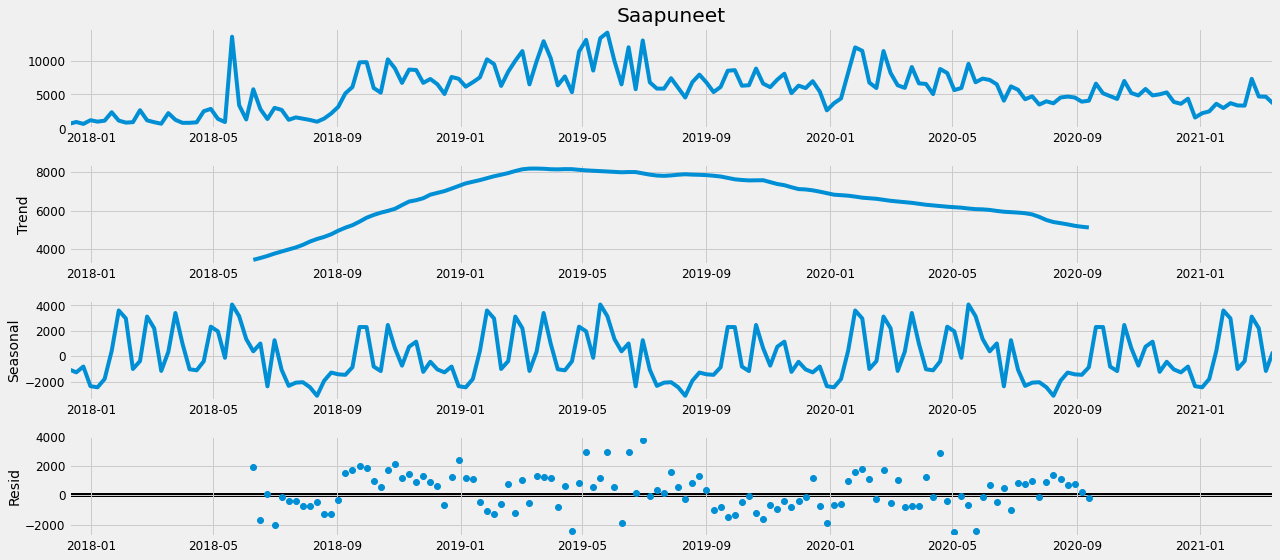

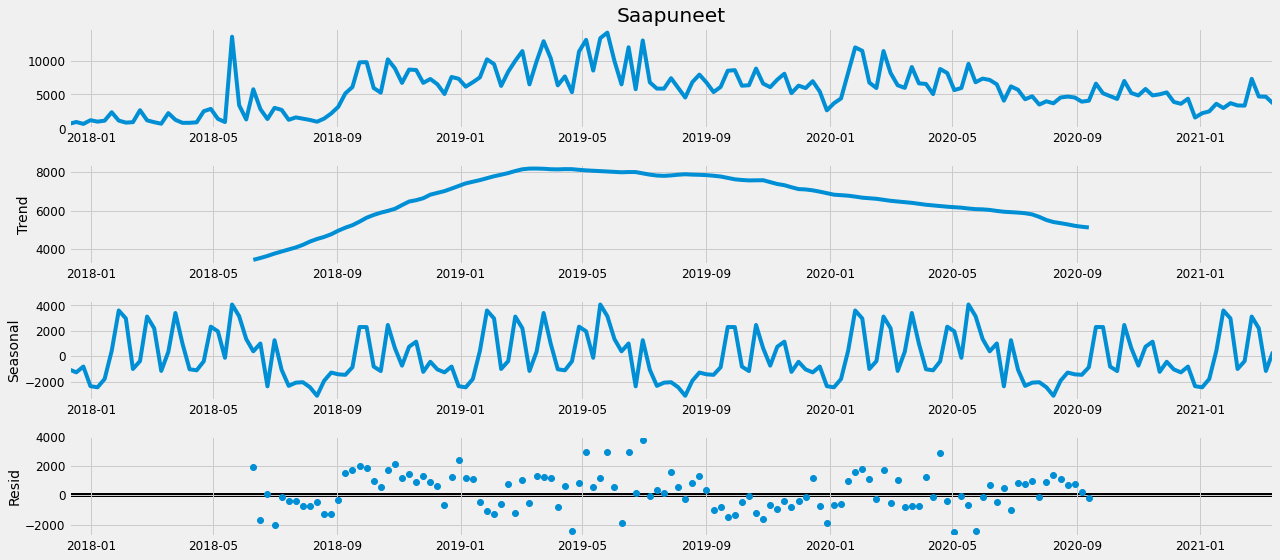

In [18]:
# Plotataan
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df['Saapuneet']).plot()